# Sentiment Analysis: Movie Reviews

------------------------------------------------------------------------------------------------------------------------

# Importing required libraries and dataset

In [ ]:
#importing libraries
import pandas as pd
import nltk
import re
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix

nltk.download('stopwords')
nltk.download('punkt')

#importing the dataset
df = pd.read_csv("IMDB Dataset.csv")

cdf = df.copy()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
cdf.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


# Pre-Processing

In [ ]:
#pre-processing methods


def rem_html(text):
    return re.sub("<[^>]+>"," ", text)

def rem_url(text):
    return re.sub("\w+://\S+"," ", text)

def rem_date(text):
    return re.sub("([0-9]{2}-[0-9]{1,2}-[0-9]{4})|([0-9]{2}/[0-9]{1,2}/[0-9]{4})"," ",text)

def rem_specialChar(text):
   return re.sub('[^a-zA-z0-9\s]'," ",text)

def lowerCase(text):
    return(text.lower())
    

In [ ]:
#preparation for stopwords removal
stop=set(stopwords.words('english'))
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [ ]:
#stemmer method
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

In [ ]:
#Applying the pre-processing methods
df['review'] = df['review'].apply(rem_html)
df['review'] = df['review'].apply(rem_url)
df['review'] = df['review'].apply(rem_date)
df['review'] = df['review'].apply(remove_stopwords)
df['review'] = df['review'].apply(simple_stemmer)
df['review'] = df['review'].apply(rem_specialChar)
df['review'] = df['review'].apply(lowerCase)

# Data Exploration

In [ ]:
#simple data exploration to check the changes applied
df['review'].head()

0    one review mention watch 1 oz episod   hooked ...
1    wonder littl production  film techniqu unassum...
2    thought wonder way spend time hot summer weeke...
3    basic   famili littl boy   jake   think   zomb...
4    petter mattei     love time money   visual stu...
Name: review, dtype: object

## 10 Most common words

In [ ]:
#storing the positive and negative sentiments, and displaying the most common of them
positivedf = df[df['sentiment'] == 'positive']#Positive Reviews
negativedf = df[df['sentiment'] == 'negative']#Negative Reviews

positivejoin = Counter((" ".join(positivedf['review']).split()))#Count Frequency of All words in the positive reviews

print("10 Most common positive words: ")
print(positivejoin.most_common(10))

######################################
negativejoin = Counter((" ".join(negativedf['review']).split()))#Count Frequency of All words in the negative reviews

print("10 Most common Negative words: ")
print(negativejoin.most_common(10))

10 Most common positive words: 
[('film', 49891), ('movi', 38710), ('one', 27997), ('like', 20096), ('time', 15644), ('good', 15245), ('see', 14829), ('make', 13363), ('great', 13097), ('well', 13032), ('get', 12640), ('watch', 12634), ('stori', 12619), ('charact', 12572), ('love', 12270), ('show', 10884), ('also', 10793), ('realli', 10638), ('would', 10595), ('play', 9945), ('even', 9880), ('scene', 9447), ('first', 9235), ('much', 9201), ('end', 8807), ('way', 8689), ('best', 8520), ('think', 8442), ('go', 8270), ('peopl', 8267)]
10 Most common Negative words: 
[('movi', 50344), ('film', 44101), ('one', 26866), ('like', 24159), ('make', 15686), ('even', 15405), ('get', 15208), ('good', 14915), ('bad', 14775), ('watch', 14651), ('time', 14596), ('would', 14007), ('charact', 13013), ('see', 12992), ('realli', 12137), ('look', 11676), ('scene', 10771), ('much', 10117), ('act', 9920), ('go', 9825), ('stori', 9738), ('could', 9299), ('end', 9258), ('thing', 9230), ('peopl', 8986), ('think

## Unique words

In [ ]:
#finding the number of unique words in each sentiment
unpositive = set(" ".join(positivedf['review']).split())
print("Unique Positive words:")
print(len(unpositive))
############################################
unNegative = set(" ".join(negativedf['review']).split())
print("Unique Negative words:")
print(len(unNegative))

Unique Positive words:
64913
Unique Negative words:
62591


In [ ]:
# random 20 unique words from positive
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=80)

list_keys = list(positivejoin.keys())[0:20]
list_vals = list(positivejoin.values())[0:20]
plt.bar(list_keys,list_vals)

# random 20 unique words from negative
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=80)

list_keys = list(negativejoin.keys())[0:20]
list_vals = list(negativejoin.values())[0:20]
plt.bar(list_keys,list_vals)

## Distribution of 1000 unique words (randomly)    

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=80)

list_keys = list(positivejoin.keys())[0:1000]
list_vals = list(positivejoin.values())[0:1000]
plt.scatter(list_keys,list_vals)

from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=80)

list_keys = list(negativejoin.keys())[0:1000]
list_vals = list(negativejoin.values())[0:1000]
plt.scatter(list_keys,list_vals)

In [ ]:
# Finding 5 words in postive and not in nagitive and second way
# in positive
x = 0
for i in unpositive:
    if x == 5:
        break
    if i in unNegative:
        continue
    else:
        x = x + 1
        print(i)

# the words: toyoda carii cleared pilger ferrailleur

# in nagative
x = 0
for i in unNegative:
    if x == 5:
        break
    if i in unpositive:
        continue
    else:
        x = x + 1
        print(i)

# the words: venger oralist medem capracorn handhold


## Distribution of the words lengths 

this is for neg


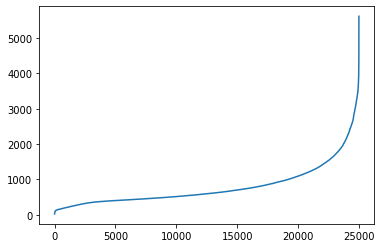

this is for pos


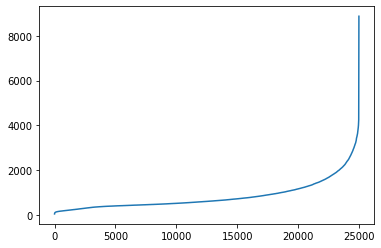

In [ ]:
# instatializing empty lists
num_chr_pos = []
num_chr_neg = []
# counting the number of letters in each review
for i in positivedf['review']:
    num_chr_pos.append(len(i))
for i in negativedf['review']:
    num_chr_neg.append(len(i))


num_chr_pos = sorted(num_chr_pos)
num_chr_neg = sorted(num_chr_neg)


print("this is for neg")
plt.plot(num_chr_neg)
plt.show()

print("this is for pos")
plt.plot(num_chr_pos)
plt.show()




In [ ]:
# instatializing empty lists
num_word_pos = []
num_word_neg = []
# counting the number of words in each sentiment class
for i in positivedf['review']:
    num_word_pos.append(len(i.split()))
for i in negativedf['review']:
    num_word_neg.append(len(i.split()))



print("this is for neg")
plt.plot(num_word_neg)
plt.show()

print("this is for pos")
plt.plot(num_word_pos,color="red")
plt.show()

In [ ]:
pos_most_words = dict(Counter(num_word_pos))
neg_most_words = dict(Counter(num_word_neg))


names = list(pos_most_words.keys())
values = list(pos_most_words.values())

#plt.figure(figsize=(90,40))

plt.bar(names, values)
plt.show()
plt.scatter(names, values)
plt.show()


names = list(neg_most_words.keys())
values = list(neg_most_words.values())


plt.bar(names, values,color="red")
plt.show()
plt.scatter(names, values,color="red")
plt.show()

In [ ]:
#finding the number of reviews in each sentiment...
#and the highest and lowest number of words in a review for each sentiment.

# num_word_pos = []
# num_word_neg = []
#length of all
print(len(num_word_pos))
print(len(num_word_neg))
# max length of words
print(num_word_pos[-1])
print(num_word_neg[-1])
# # min length of words
print(num_word_pos[0])
print(num_word_neg[0])

#print(pos_most_words)

25000
25000
1453
839
6
3


## N-Grams, RFT, and Word Cloud

In [ ]:
def rtf(poscounter, negcounter):#takes counters of 2 df and returns the Relative Frequency Ratio RFR rfr=a÷b/c÷d
    keywords_processed = {}

    pos  = poscounter
    neg = negcounter

    total_pos = sum(pos.values())
    total_neg = sum(neg.values())
    for word in pos:

        keywords_processed[word] = ((pos[word]/(neg[word]+1))/(total_pos/total_neg))

    sorted_words = sorted(keywords_processed.items(), key=lambda item: item[1])
    return(sorted_words)

In [ ]:
def bigrams_gen(text):#takes text and returns a tuple of bigrams
    token = (nltk.word_tokenize(text))
    return(list(nltk.bigrams(token)))

In [ ]:
def trigrams_gen(text):#takes text and returns a tuple of trigrams
    token = (nltk.word_tokenize(text))
    return(list(nltk.trigrams(token)))

In [ ]:
def flatt(li):#takes list of lists of tuples [[()]] and returns list of tuples [()] 
    templi = []
    for elm in li:
        templi.extend(elm)
    return(templi)

In [ ]:
def ngrams(df):#takes a Data Frame and returns bigrams and trigrams consecutively in form of list of tuples [()]
    bigrams = []
    trigrams = []
    
    bigrams = df['review'].apply(bigrams_gen)
    trigrams = df['review'].apply(trigrams_gen)
    
    return(flatt(bigrams.to_list()) ,flatt(trigrams.to_list()))

In [ ]:
bigrams, trigrams = ngrams(df)

In [ ]:
def wordcloudpre(bi, tri):#pepare bigrams and trigrams for the Word_Cloud function
    for i in range(len(bi)):
        bi[i] = "_".join(bi[i])
    
    for i in range(len(tri)):
        tri[i] = "_".join(tri[i])
        
    bi = " ".join(bi)
    tri = " ".join(tri)
    return(bi, tri)

In [ ]:
def word_Cloud(df,max_words, dfname):#Draw the word cloud
    #text = " ".join(df)
    stop=set(stopwords.words('english'))
    wordcloud = WordCloud(stopwords=stop, background_color="white", max_words=max_words).generate(df)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Most Common " + str(max_words) + " Words in the " + dfname)
    plt.show()

In [ ]:
word_Cloud(df,50, "Data Frame")

In [ ]:
word_Cloud(positivedf,50, "Positive Data Frame")

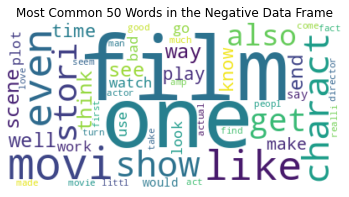

In [ ]:
#word_Cloud(negativedf,50, "Negative Data Frame")

In [ ]:
def wordcloudcom(podf, negdf, ngram, max_words):#Takes a positive and a negative data frames (Raw DF), the ngrams for the plot(2 or 3), number of words to be plotted, and plot a word cloud for both positive and negative
    posbigrams, postrigrams = ngrams(positivedf)
    negbigrams, negtrigrams = ngrams(negativedf)
    
    posbiwc, postriwc = wordcloudpre(posbigrams, postrigrams)
    negbiwc, negtriwc = wordcloudpre(negbigrams, negtrigrams)
    
    if(ngram == 2):
        word_Cloud(posbiwc,max_words, " Positive Words Using Bigrams")
        word_Cloud(negbiwc,max_words, " negative Words Using Bigrams")
    if(ngram == 3):
        word_Cloud(postriwc,max_words, " Positive Words Using Trigrams")
        word_Cloud(negtriwc,max_words, " negative Words Using Trigrams")
    

In [ ]:
wordcloudcom(positivedf, negativedf, 3, 25)

# Training

## Preparations

In [ ]:
########Train Test Split
RAND_STATE = 476
test_size = 0.25
idx_train, idx_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.25, random_state=RAND_STATE)

In [ ]:
########Create Bag of Words
#Count vectorizer for bag of words
cv=CountVectorizer()

#transformed train reviews
bow_train=cv.fit_transform(idx_train)

#transformed test reviews
bow_test=cv.transform(idx_test)


In [ ]:
#############Create the TFIDF
#Tfidf vectorizer
tv=TfidfVectorizer()

#transformed train reviews
tfidf_train=tv.fit_transform(idx_train)

#transformed test reviews
tfidf_test=tv.transform(idx_test)

In [ ]:
#Confusion Matrix
def conmat(y_test, y_pred):
    #Generate the confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

    

## Word2Vec Attempt (Incomplete)

In [ ]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
! pip install python-levenshtein
from Levenshtein import *
model = Word2Vec(vector_size=100, window=10, min_count=2, workers=4)
#model.save("word2vec.model")

     |████████████████████████████████| 50 kB 6.9 MB/s 
  Created wheel for python-levenshtein: filename=python_Levenshtein-0.12.2-cp39-cp39-linux_x86_64.whl size=83309 sha256=1f0ae473d8166422ec1bdc45c3b306c4047d6b572f7432f0ade788df0d25cd87
  Stored in directory: /root/.cache/pip/wheels/46/4a/6c/164a1d9dd67c82d208f19d869ad0a517a0c5a6117f608c53e6
Successfully built python-levenshtein
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
#model = Word2Vec.load("word2vec.model")

cdf = df.copy()
review_text = cdf.review.apply(gensim.utils.simple_preprocess)
review_text

In [ ]:
model.build_vocab(review_text, progress_per = 1000)
model.save("word2vec.model")

In [ ]:
model.train(review_text, total_examples = model.corpus_count, epochs = model.epochs)
model.save("word2vec.model")

Multiple means to train this model -on our personal computers- failed, mostly due to the limitation of processing power.

## Processing

### Multinomial Naïve Bayes

              precision    recall  f1-score   support

    negative       0.87      0.85      0.86      6431
    positive       0.84      0.86      0.85      6069

    accuracy                           0.86     12500
   macro avg       0.86      0.86      0.86     12500
weighted avg       0.86      0.86      0.86     12500



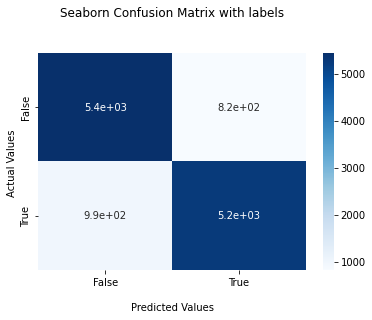

In [ ]:
#########MultiNomial NB With Bag of words
clf = MultinomialNB()
# fit the classifier on the X_train and y_train
clf.fit(bow_train, y_train)
#
y_pred = clf.predict(bow_test)

print(classification_report(y_pred, y_test))
conmat(y_test, y_pred)

              precision    recall  f1-score   support

    negative       0.87      0.86      0.86      6349
    positive       0.85      0.87      0.86      6151

    accuracy                           0.86     12500
   macro avg       0.86      0.86      0.86     12500
weighted avg       0.86      0.86      0.86     12500



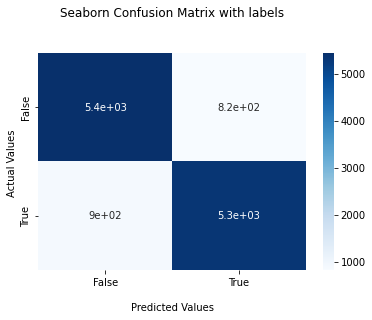

In [ ]:
#########MultiNomial NB With TFIDF
clf = MultinomialNB()
# fit the classifier on the X_train and y_train
clf.fit(tfidf_train, y_train)
#
y_pred = clf.predict(tfidf_test)

print(classification_report(y_pred, y_test))
conmat(y_test, y_pred)

### Logistic Regression

              precision    recall  f1-score   support

    negative       0.88      0.89      0.88      6159
    positive       0.89      0.88      0.88      6341

    accuracy                           0.88     12500
   macro avg       0.88      0.88      0.88     12500
weighted avg       0.88      0.88      0.88     12500



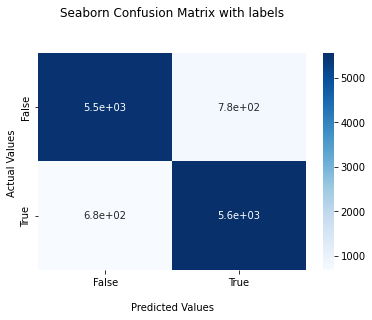

In [ ]:
##############Logistic Regression With Bag of words 
clf = LogisticRegression(solver='lbfgs', max_iter=1000)


# Q: fit
clf.fit(bow_train,y_train)
# Q: predict
y_pred = clf.predict(bow_test)
print(classification_report(y_pred, y_test))
conmat(y_test, y_pred)

              precision    recall  f1-score   support

    negative       0.88      0.90      0.89      6080
    positive       0.91      0.88      0.89      6420

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



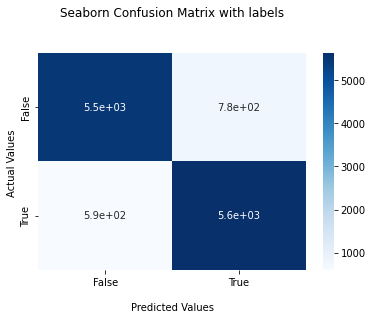

In [ ]:
##############Logistic Regression With TFIDF
clf = LogisticRegression(solver='lbfgs', max_iter=1000)


# Q: fit
clf.fit(tfidf_train,y_train)
# Q: predict
y_pred = clf.predict(tfidf_test)
print(classification_report(y_pred, y_test))
conmat(y_test, y_pred)

### K-Nearest Neighbours (KNN)

              precision    recall  f1-score   support

    negative       0.70      0.62      0.66      7071
    positive       0.57      0.66      0.61      5429

    accuracy                           0.64     12500
   macro avg       0.64      0.64      0.64     12500
weighted avg       0.65      0.64      0.64     12500



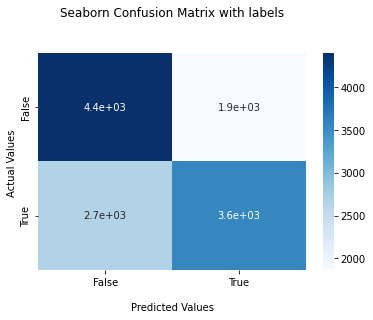

In [ ]:
#from sklearn.naive_bayes import MultinomialNB

knn = KNeighborsClassifier(n_neighbors=7)

#clf = MultinomialNB()
# fit the classifier on the X_train and y_train
knn.fit(bow_train, y_train)
#
y_pred = knn.predict(bow_test)

print(classification_report(y_pred, y_test))
conmat(y_test, y_pred)

              precision    recall  f1-score   support

    negative       0.28      0.87      0.43      2027
    positive       0.96      0.57      0.71     10473

    accuracy                           0.62     12500
   macro avg       0.62      0.72      0.57     12500
weighted avg       0.85      0.62      0.67     12500



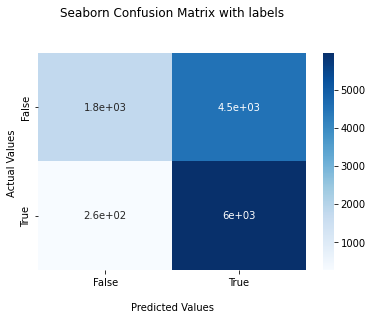

In [ ]:
#from sklearn.naive_bayes import MultinomialNB

knn = KNeighborsClassifier(n_neighbors=1000)

#clf = MultinomialNB()
# fit the classifier on the X_train and y_train
knn.fit(bow_train, y_train)
#
y_pred = knn.predict(bow_test)

print(classification_report(y_pred, y_test))
conmat(y_test, y_pred)

### Light Gradient Boosting Machine (LightGBM)

              precision    recall  f1-score   support

    negative       0.84      0.87      0.85      6055
    positive       0.87      0.84      0.86      6445

    accuracy                           0.86     12500
   macro avg       0.86      0.86      0.86     12500
weighted avg       0.86      0.86      0.86     12500



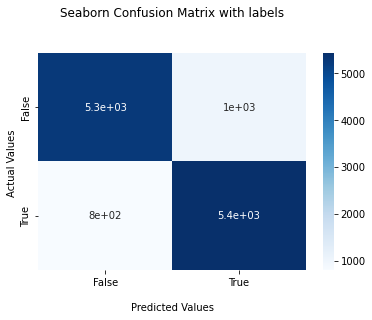

In [ ]:
##############LightGBM With Bag of words 
import lightgbm as lgb
clf = lgb.LGBMClassifier()

bow_test1 = bow_test.astype('float32')
bow_train1 = bow_train.astype('float32')

clf.fit(bow_train1,y_train)
# Q: predict
y_pred = clf.predict(bow_test1)
print(classification_report(y_pred, y_test))
conmat(y_test, y_pred)

              precision    recall  f1-score   support

    negative       0.84      0.87      0.85      6036
    positive       0.87      0.84      0.86      6464

    accuracy                           0.85     12500
   macro avg       0.85      0.85      0.85     12500
weighted avg       0.85      0.85      0.85     12500



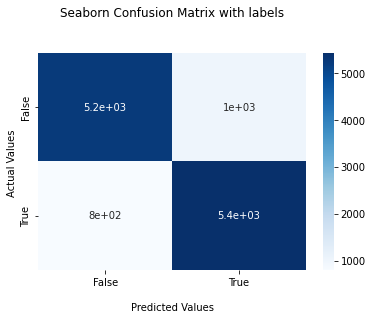

In [ ]:
##############LightGBM With Tf-idf
clf.fit(tfidf_train,y_train)
# Q: predict
y_pred = clf.predict(tfidf_test)
print(classification_report(y_pred, y_test))
conmat(y_test, y_pred)

### Support Vector Machine (SVM)

In [ ]:
#SVM with if-idf
from sklearn import model_selection, svm
# .fit(tfidf_train,y_train)
# y_pred = clf.predict(tfidf_test)
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(tfidf_train,y_train)


SVC(gamma='auto', kernel='linear')

              precision    recall  f1-score   support

    negative       0.88      0.90      0.89      6125
    positive       0.90      0.88      0.89      6375

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



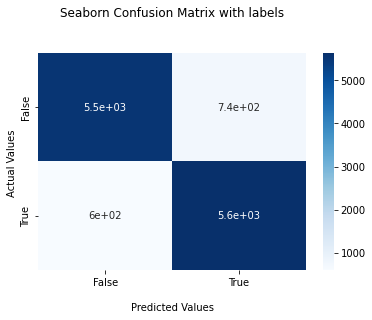

In [ ]:
y_pred = SVM.predict(tfidf_test)
print(classification_report(y_pred, y_test))
conmat(y_test, y_pred)

In [ ]:
#SVM with BOW
from sklearn import model_selection, svm
#SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(bow_train,y_train)
# Q: predict
y_pred = clf.predict(bow_test)
print(classification_report(y_pred, y_test))
conmat(y_test, y_pred)


y_pred = SVM.predict(tfidf_test)
print(classification_report(y_pred, y_test))
conmat(y_test, y_pred)

In [ ]:
#SVM with BOW

from sklearn import model_selection, svm
SVM= svm.fit(bow_train,y_train)
# Q: predict
y_pred = clf.predict(bow_test)
print(classification_report(y_pred, y_test))
conmat(y_test, y_pred)



### Recurrent Neural Network (RNN)

In [ ]:
max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=25,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

## Comprehensive Processing

### BoW for all models with a specified N-Gram 

In [ ]:
def bowres(ngram):#train diffrent models with bag of words using diffrent ngrams
    #############Create Bg of words
    #Count vectorizer for bag of words
    cv=CountVectorizer(ngram_range = (ngram,ngram))
    #transformed train reviews
    bow_train=cv.fit_transform(idx_train)
    #transformed test reviews
    bow_test=cv.transform(idx_test)
    
    #########MultiNomial NB With Bag of words
    clf = MultinomialNB()
    # fit the classifier on the X_train and y_train
    clf.fit(bow_train, y_train)
    y_pred = clf.predict(bow_test)
    print("MultiNomial NB With Bag of words:")
    print(classification_report(y_pred, y_test))
    conmat(y_test, y_pred)
    
    ##############Logistic Regression With Bag of words 
    clf = LogisticRegression(solver='lbfgs', max_iter=1000)
    clf.fit(bow_train,y_train)
    y_pred = clf.predict(bow_test)
    print("Logistic Regression With Bag of words:")
    print(classification_report(y_pred, y_test))
    conmat(y_test, y_pred)
    
    ############## KNN With Bag of words 
    knn = KNeighborsClassifier(n_neighbors=1000)
    # fit the classifier on the X_train and y_train
    knn.fit(bow_train, y_train)
    y_pred = knn.predict(bow_test)
    print("KNN With Bag of words:")
    print(classification_report(y_pred, y_test))
    conmat(y_test, y_pred)
    
    ##############LightGBM With Bag of words 
    import lightgbm as lgb
    clf = lgb.LGBMClassifier()
    bow_test1 = bow_test.astype('float32')
    bow_train1 = bow_train.astype('float32')
    clf.fit(bow_train1,y_train)
    y_pred = clf.predict(bow_test1)
    print("LightGBM With Bag of words:")
    print(classification_report(y_pred, y_test))
    conmat(y_test, y_pred)
    
    ##############SVM with BOW
    SVM.fit(bow_train,y_train)
    y_pred = clf.predict(bow_test)
    print("SVM with Bag of words:")
    print(classification_report(y_pred, y_test))
    conmat(y_test, y_pred)

### TFIDF for all models with a specified N-Gram 

In [ ]:
def tfidfres(ngram):#train diffrent models with tfidf using diffrent ngrams
    #############Create the TFIDF
    #Tfidf vectorizer
    tv=TfidfVectorizer(ngram_range = (ngram,ngram))
    #transformed train reviews
    tfidf_train=tv.fit_transform(idx_train)
    #transformed test reviews
    tfidf_test=tv.transform(idx_test)
    
    #########MultiNomial NB With tfidf
    clf = MultinomialNB()
    # fit the classifier on the X_train and y_train
    clf.fit(tfidf_train, y_train)
    y_pred = clf.predict(tfidf_test)
    print("MultiNomial NB With tfidf:")
    print(classification_report(y_pred, y_test))
    conmat(y_test, y_pred)
    
    ##############Logistic Regression With tfidf 
    clf = LogisticRegression(solver='lbfgs', max_iter=1000)
    clf.fit(tfidf_train,y_train)
    y_pred = clf.predict(tfidf_test)
    print("Logistic Regression With tfidf:")
    print(classification_report(y_pred, y_test))
    conmat(y_test, y_pred)
    
    ############## KNN With tfidf
    knn = KNeighborsClassifier(n_neighbors=1000)
    # fit the classifier on the X_train and y_train
    knn.fit(tfidf_train, y_train)
    y_pred = knn.predict(tfidf_test)
    print("KNN With tfidf:")
    print(classification_report(y_pred, y_test))
    conmat(y_test, y_pred)
    
    ##############LightGBM With tfidf
    import lightgbm as lgb
    clf = lgb.LGBMClassifier()
    tfidf_test1 = tfidf_test.astype('float32')
    tfidf_train1 = tfidf_train.astype('float32')
    clf.fit(tfidf_train1,y_train)
    y_pred = clf.predict(tfidf_test1)
    print("LightGBM With tfidf:")
    print(classification_report(y_pred, y_test))
    conmat(y_test, y_pred)
    
    ##############SVM with tfidf
    SVM.fit(tfidf_train,y_train)
    y_pred = clf.predict(tfidf_test)
    print("SVM with tfidf:")
    print(classification_report(y_pred, y_test))
    conmat(y_test, y_pred)

## Self-Made Model

The model works as follows:

1. we calculate the average number of words in each sentiment 
2. add a certain range to each average e.g. positive (67 - 79) and negative (80 - 92)
3. whenever the method is called, we check where the tested word lies (its number of words within the range of positive or negative) and classify it accordingly. if the number of words is out of these ranges, then classification  will be random.

We achieved approximately 50 accuracy with this model 


In [ ]:
#### Data Exploration ####


# num_word_pos = []
# num_word_neg = []
#length of all
print(len(num_word_pos))
print(len(num_word_neg))
# max length of words
print(num_word_pos[-1])
print(num_word_neg[-1])
# # min length of words
print(num_word_pos[0])
print(num_word_neg[0])

#sorted 
print(sorted(num_word_pos))
print(sorted(num_word_neg))

#counter
print(pos_most_words) 
print(neg_most_words) 

#mean 
def avrg(lst):
    return sum(lst) / len(lst)
print(avrg(num_word_pos))
print(avrg(num_word_neg))

#mean without extrame 
print(avrg(num_word_pos[0:24500]))
print(avrg(num_word_neg[0:24500]))

### Building The Model

In [ ]:
sort_pos_words = sorted(pos_most_words.items(), key=lambda x: x[1],reverse=True)
#print(sort_pos_words)
sort_neg_words = sorted(neg_most_words.items(), key=lambda x: x[1],reverse=True)
#print(sort_neg_words)

hun_pos = []
num_hun_pos = []
for i in sort_pos_words[0:100]:
  hun_pos.append(i[0])
  num_hun_pos.append(i[1])
hun_neg = []
num_hun_neg = []
for i in sort_neg_words[0:100]:
  hun_neg.append(i[0])
  num_hun_neg.append(i[1])

#Tried 200 100 50 samples and found most distributed was 100
print(sorted(hun_pos))
print(sorted(hun_neg))

# The avrage

print(avrg(hun_pos))
print(avrg(hun_neg))


#Building Model Number of words:
import numpy as np
import re
# stat of the data 
avr_pos = 77.72
avr_neg = 82.58
# std 
# records of number of words (we do not need it because it is very similiar and make sense becasue we got the most frequene in both)
#std_pos = np.std(hun_pos)
#print(std_pos)
#std_neg = np.std(hun_neg)
#print(std_neg)
# record of words
std_pos_val = np.std(num_hun_pos)
print(std_pos_val)
std_neg_val = np.std(num_hun_neg)
print(std_neg_val)

pos_std = 70.49531899353317
neg_std = 77.55009929071659

def model_word(lst):
  import random
  lst =  re.sub("<[^>]+>"," ", lst)
  lst = re.sub("\w+://\S+"," ", lst)
  lst = re.sub("\W"," ", lst)
  lst = re.sub("([0-9]{2}-[0-9]{1,2}-[0-9]{4})|([0-9]{2}/[0-9]{1,2}/[0-9]{4})"," ",lst)
  lst = lst.lower()
  lst = re.sub('[^a-zA-z0-9\s]'," ",lst)
  # (67 - 79) positive
  # (80 - 92) negative
  avr_pos = 77.72
  avpp = avr_pos+2
  avpm = avr_pos-10
  avr_neg = 82.58
  avnp = avr_neg+10
  avnm = avr_pos-2
  wn = len(lst)
  #if (wn < avr_neg and wn > avr_pos):
  if(wn <= avpp and wn >= avpm):
    return "positive"
  elif(wn <= avnp and wn >= avnm):
    return "negative"
  else:
    pn = ["positive","negative"]
    rnd = random.randint(0,1) 
    return pn[rnd] 


#ex = model_word("This movie is a bad  alkdsf jalskd jfalksd faklsd jf;lkajs dlfkaj sd;kfja sdkjf;alkdsjf ;lajsd flkajsd lkfjasdkl fja;lsdkfj alksdjf ;alkjsdf lkajsd lfkja")
#print(ex)

test_x = df["review"][0:1000]
test_y = df["sentiment"][0:1000]
# print(test_x)
# print(test_y)
tr = 0
ans = []

for i in range(100):
  for i in range(1000):
    out = model_word(test_x[i])
    if out == test_y[i]:
        tr += 1
  ans.append(tr)
  tr = 0

print(avrg(ans))

### Testing the model

In [ ]:
test_x = df["review"][0:10000]
test_y = df["sentiment"][0:10000]
# print(test_x)
# print(test_y)
tr = 0
ans = []

for i in range(100):
  for i in range(10000):
    out = model_word(test_x[i])
    if out == test_y[i]:
        tr += 1
  ans.append(tr)
  tr = 0

print(avrg(ans))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e0cd0f83-f874-46b0-9204-10aa69dd4ce8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>